### 1. Implementing the intensity transformation

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

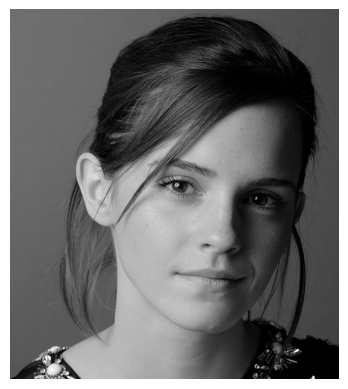

In [30]:
emma = cv2.imread('emma.jpg')
emma_grayscale=cv2.cvtColor(emma,cv2.COLOR_BGR2GRAY)

plt.imshow(emma_grayscale, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

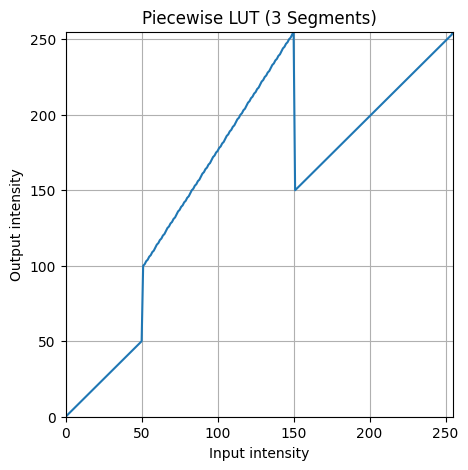

In [32]:
# Define piecewise transformation function
t1 = np.linspace(0,   50,  num=51,  dtype=np.uint8)   
t2 = np.linspace(100, 255, num=100, dtype=np.uint8)   
t3 = np.linspace(150, 255, num=105, dtype=np.uint8)

# Concatenate all segments to create the transformation array
transform = np.concatenate((t1, t2, t3))

plt.figure(figsize=(5,5))
plt.plot(np.arange(256), transform)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("Piecewise LUT (3 Segments)")
plt.show()

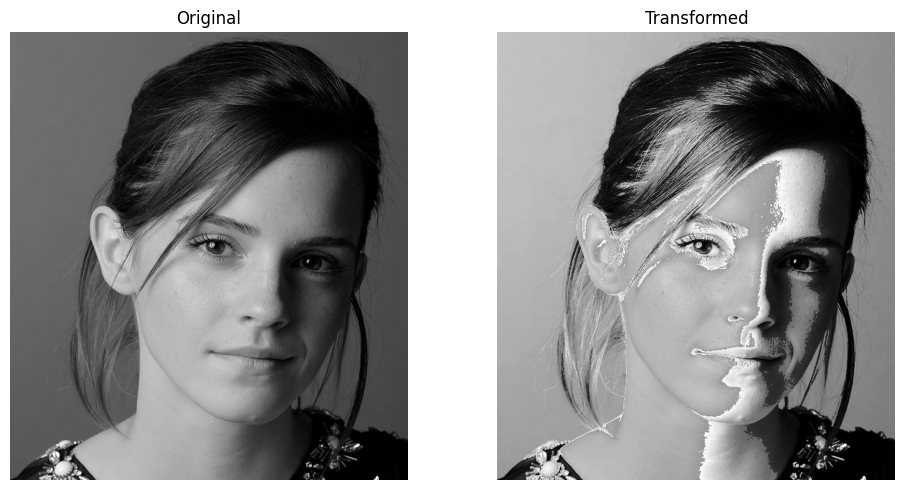

In [33]:
# generating the transformed image
emma_transformed = cv2.LUT(emma_grayscale, transform)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(emma_grayscale, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(emma_transformed, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Transformed')
axes[1].axis("off")


plt.tight_layout()
plt.show()

### Show the intensity transformations as a plots for the brain proton density image

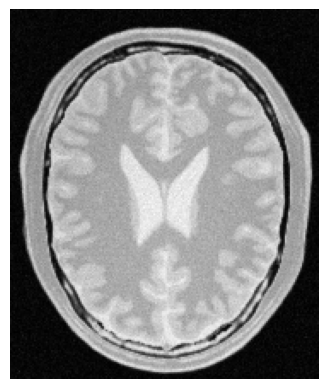

In [35]:
brain=cv2.imread('brain_proton_density_slice.png')
brain_gray=cv2.cvtColor(brain,cv2.COLOR_BGR2GRAY)

plt.imshow(brain_gray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In brain MRIs: 

    ** White matter is brighter (high intensity range) **

    ** Gray matter is mid-intensity range **

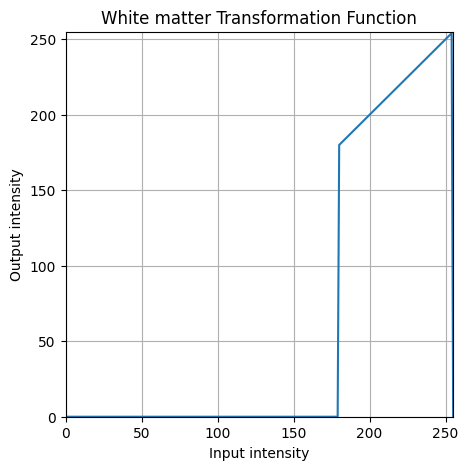

In [45]:
white_matter_start=180

t1=np.zeros(white_matter_start,dtype='uint8')
t2=np.linspace(180,256,num=76,dtype='uint8')

white_matter=np.concatenate((t1,t2))

plt.figure(figsize=(5,5))
plt.plot(np.arange(256), white_matter)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("White matter Transformation Function")
plt.show()

### White Matter

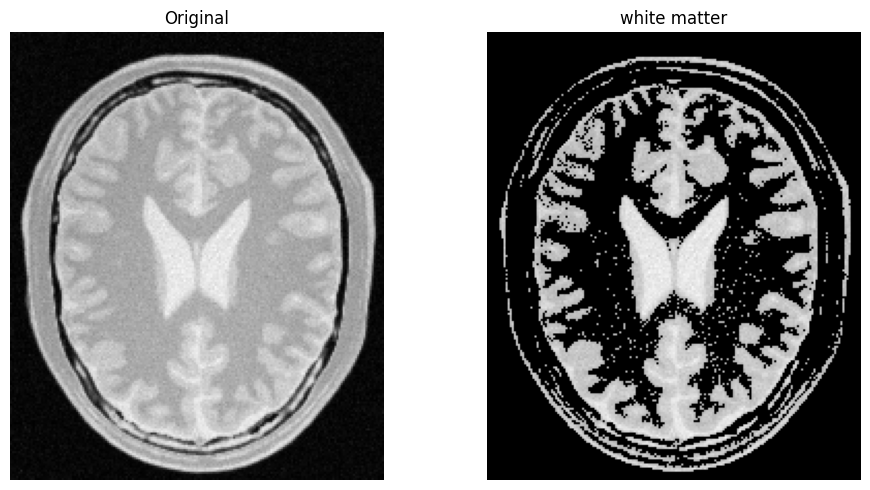

In [65]:
# generating the transformed image
brain_whiteMatter = cv2.LUT(brain_gray, white_matter)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(brain_gray, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(brain_whiteMatter, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('white matter')
axes[1].axis("off")


plt.tight_layout()
plt.show()

### Gray Matter

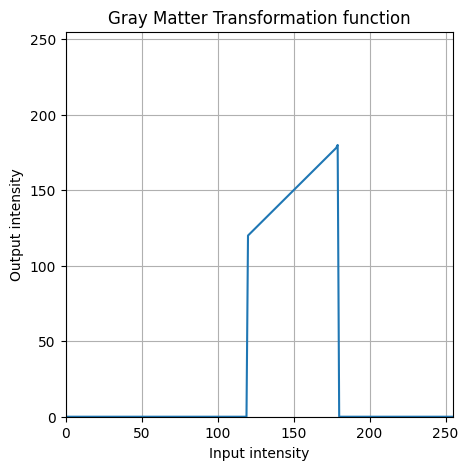

In [61]:
gray_matter_start=120
gray_matter_end=180


t1=np.zeros(120)
t2=np.linspace(gray_matter_start,gray_matter_end,num=60,dtype='uint8')
t3=np.zeros(76)

gray_matter=np.concatenate((t1,t2,t3))
gray_matter.shape


plt.figure(figsize=(5,5))
plt.plot(np.arange(256), gray_matter)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("Gray Matter Transformation function")
plt.show()

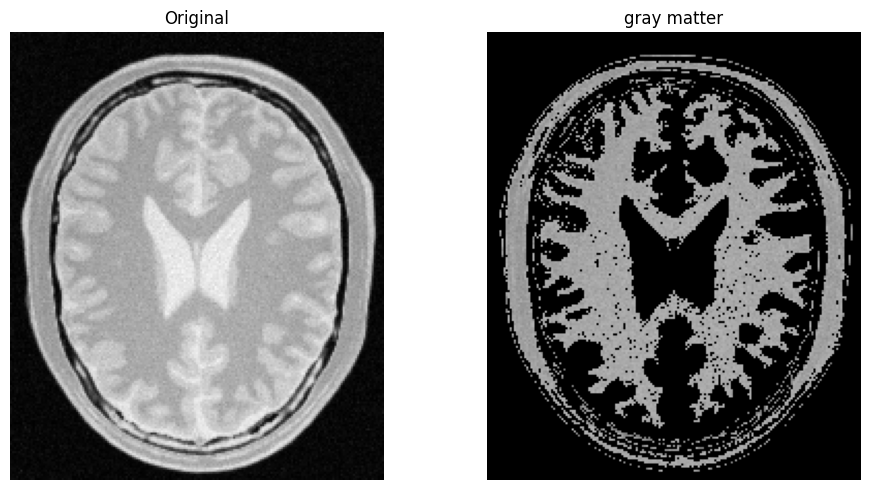

In [64]:
# generating the transformed image
brain_graymatter = cv2.LUT(brain_gray, gray_matter)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot original image
axes[0].imshow(brain_gray, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(brain_graymatter, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('gray matter')
axes[1].axis("off")


plt.tight_layout()
plt.show()

### gamma correction

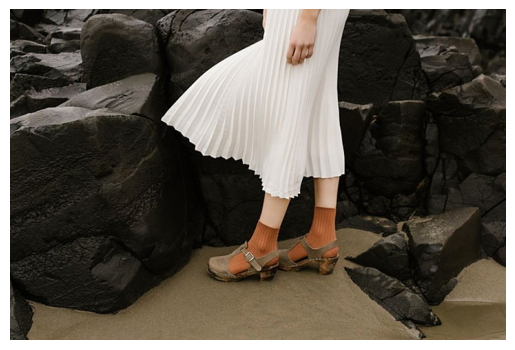

In [80]:
gamma_image = cv2.imread('highlights_and_shadows.jpg')

#converting to RGB colorspace
gamma_image_RGB=cv2.cvtColor(gamma_image,cv2.COLOR_BGR2RGB)

#converting to L∗a∗b∗ color space
gamma_lab= cv2.cvtColor(gamma_image, cv2.COLOR_BGR2Lab)
L,a,b=cv2.split(gamma_lab)

plt.imshow(gamma_image_RGB)
plt.axis('off')
plt.show()

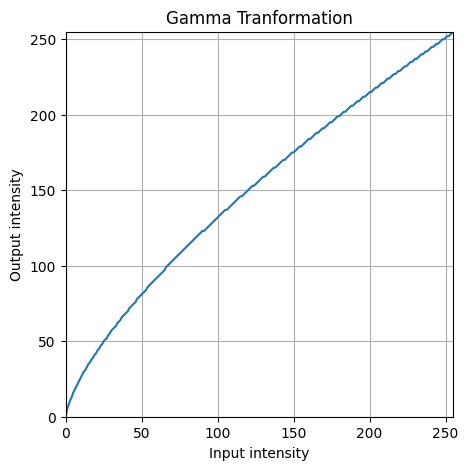

In [94]:
gamma = 0.70
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0, 256)],dtype='uint8')

plt.figure(figsize=(5,5))
plt.plot(np.arange(256), t)
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.xlim(0,255); plt.ylim(0,255); plt.grid(True)
plt.title("Gamma Tranformation")
plt.show()

In [96]:
ModifiedL = cv2.LUT(L, t)

# Merge the channels
merged = cv2.merge([ModifiedL, a, b])
gamma_modified = cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)


# Plot original image
axes[0].imshow(gamma_image_RGB, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original')
axes[0].axis("off")

# Plot transformed image
axes[1].imshow(gamma_modified, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('gamma transformation')
axes[1].axis("off")


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>